In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Load the dataset into a DataFrame
df = pd.read_csv('./books.csv')

In [5]:
# Get the number of rows and columns
rows, columns = df.shape
print(f"Number of rows in the books.csv dataset: {rows}")
print(f"Number of columns in the books.csv dataset: {columns}")

Number of rows in the books.csv dataset: 399
Number of columns in the books.csv dataset: 24


In [6]:
# Count the number of books without an original title, and get count
books_without_original_title = df[df['original_title'].isnull()]
num_books_without_original_title = len(books_without_original_title)
print(f'Number of books without an original title: {num_books_without_original_title}')

Number of books without an original title: 36


In [7]:
# Remove rows with null values in the 'OriginalTitle' column, get the number of unique books based on 'book_id'
df = df.dropna(subset=['original_title'])
count_unique_books = df['book_id'].nunique()
print(f'Number of unique books after removing null values in original_title column: {count_unique_books}')

Number of unique books after removing null values in original_title column: 363


In [8]:
# Calculate the average rating
average_rating = df['average_rating'].mean()
print(f'Average rating of all books in the dataset: {average_rating:.2f}')

Average rating of all books in the dataset: 3.99


In [9]:
# Filter rows where 'original_publication_year' is equal to 2000, get the count
books_published = df[df['original_publication_year'] == 2000]
count_books_published = books_published.shape[0]
print(f'Number of books published in the year 2000 based on the "original_publication_year": {count_books_published}')

Number of books published in the year 2000 based on the original_publication_year: 7


In [11]:
# Find the row with the maximum 'work_ratings_count', get title
max_rating = df[df['work_ratings_count'] == df['work_ratings_count'].max()]
book_title = max_rating['title'].values[0]
print(f'The book with the maximum number of ratings is: {book_title}')

The book with the maximum number of ratings is: The Diary of a Young Girl


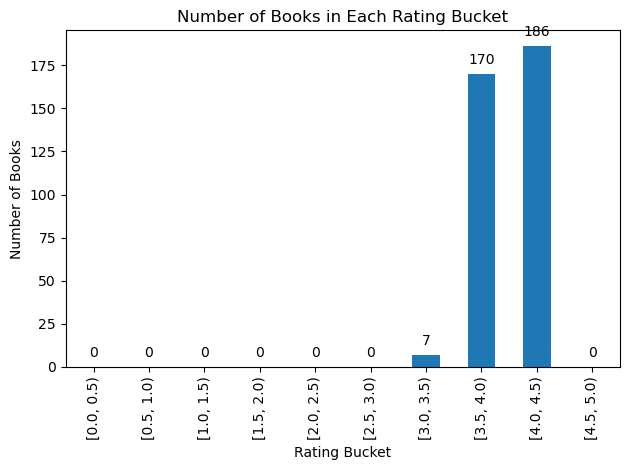

In [12]:
# Create bins for average ratings
bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

# Bucketing, Grouping and counting 
df['rating_bucket'] = pd.cut(df['average_rating'], bins, right=False)
rating_counts = df['rating_bucket'].value_counts().sort_index()

# Plot the bar graph
ax = rating_counts.plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Rating Bucket')
plt.ylabel('Number of Books')
plt.title('Number of Books in Each Rating Bucket')

# Adjust layout for better appearance
plt.tight_layout()  
plt.show()
